<a href="https://colab.research.google.com/github/amber717M/awesome-anomaly-detection/blob/master/Unsupervised_Multivariate_Anomaly_Detection_on_Cyclone_Preheater_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_excel("/content/data.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                 867.63                910.42   
1 2017-01-01 00:05:00                 879.23                918.14   
2 2017-01-01 00:10:00                 875.67                924.18   
3 2017-01-01 00:15:00                 875.28                923.15   
4 2017-01-01 00:20:00                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39

In [79]:
df.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [ ]:
df.shape

(377719, 7)

1) None of the columns has any missing value.
2) But all the columns except time have data in string format, which needs to be changed to float.

In [ ]:
df.duplicated().sum()

0

The data is free from duplicates.

In [6]:
import re
import numpy as np

numeric_columns = df.columns[1:]  # Exclude the 'time' column

for column in numeric_columns:
    # Remove non-numeric characters using regular expressions
    df[column] = df[column].apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)))

    # Convert the column to numeric type
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column].fillna(np.nan, inplace=True)

# Verify the updated data types
print(df.dtypes)




time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object


Now data seems to be in right format.

But there seems that some of the data was not rightly convertible to numeric. It may be due to presence of characters.

In [7]:
df.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [86]:
1320/376399

0.00350691686215957

Still after trying removing unwanted characters, still there are missing values, Lets handle them by filling them with mean of variable.

In [8]:
for column in numeric_columns:
  df[column].fillna(np.nan, inplace=True)

In [9]:
df.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

Since,these nan values are not getting over written by mean, lets remove them as they are already less as compared to whole dataset.

In [28]:
df=df.dropna()
df.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [13]:
df.describe()

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count           376124.000000          376124.000000   
mean               727.387946             750.828429   
std                328.634044             350.922335   
min                  0.000000            -185.000000   
25%                856.280000             867.660000   
50%                882.380000             913.360000   
75%                901.120000             943.660000   
max               1157.630000            1375.000000   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count             376124.000000       376124.000000            376124.000000   
mean                -177.830733         -164.582678               715.798475   
std                   99.138694           90.096403               325.316433   
min                 -456.660000         -459.310000                13.790000   
25%                 -247.190000         -226.770000               802.040000   
50%                 -215.260000         -198.570000               871.530000   
75%                 -170.150000         -143.680000               899.300000   
max                   40.270000          488.860000              1375.000000   

       Cyclone_Inlet_Draft  
count        376124.000000  
mean           -141.309826  
std              77.609444  
min            -396.370000  
25%            -193.510000  
50%            -169.460000  
75%            -136.310000  
max              41.640000

In [14]:
import matplotlib.pyplot as plt


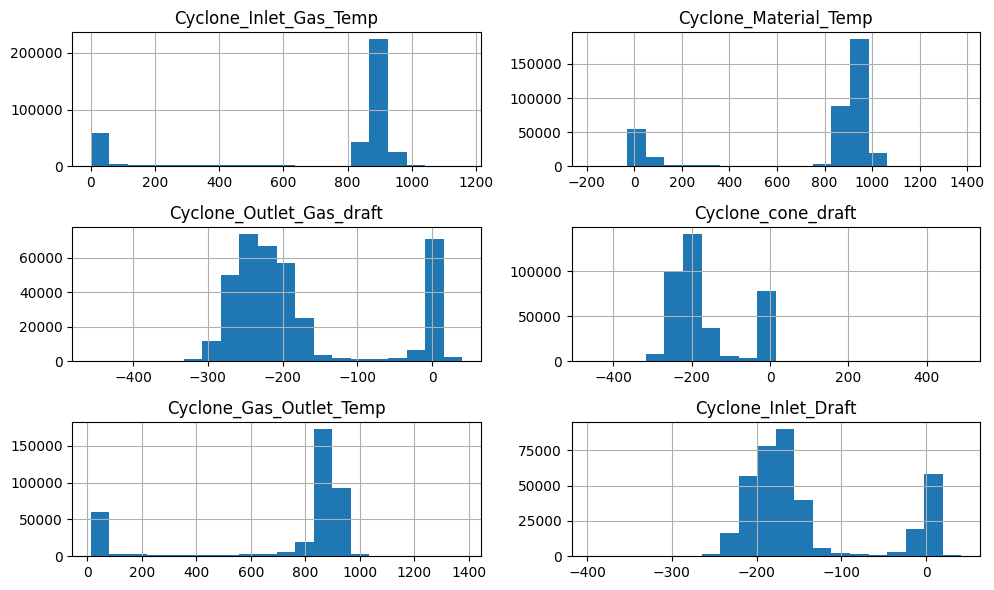

In [15]:
# Histograms of numeric variables
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
df[numeric_columns].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

We are able to see that some data values are very differrent,shows abnormality from rest of the clustered values in each numeric column.

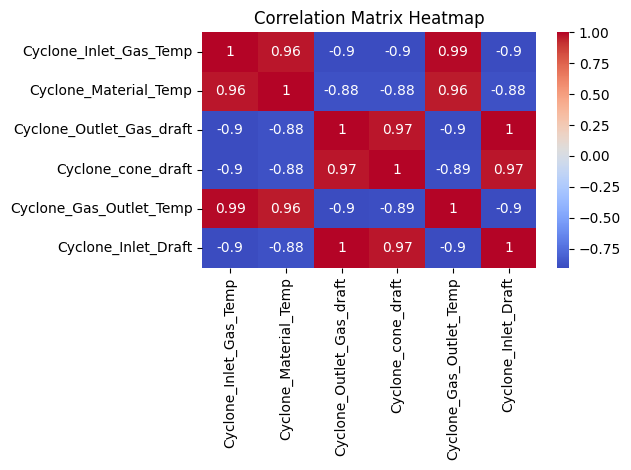

In [16]:
# Correlation matrix heatmap
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

The above correlation matrix show a very high positive and negative correlation among variables, which is very obvious as each variable is a parameter of linked (chained) process in cyclone preheater.

And maximum correlation is between Cyclone_Inlet_Draft and Cyclone_Outlet_Gas_draft(pearson correlation : 1 )

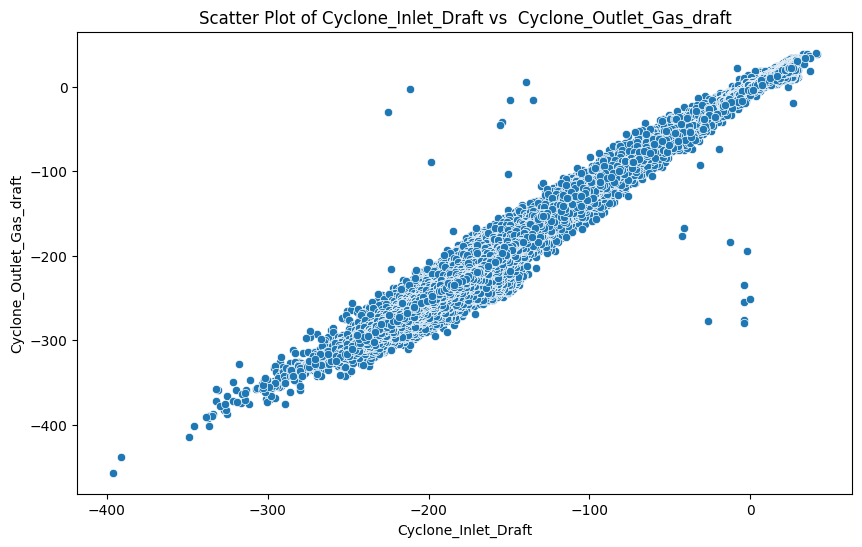

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyclone_Inlet_Draft', y='Cyclone_Outlet_Gas_draft')
plt.title('Scatter Plot of Cyclone_Inlet_Draft vs  Cyclone_Outlet_Gas_draft')
plt.xlabel('Cyclone_Inlet_Draft')
plt.ylabel('Cyclone_Outlet_Gas_draft')
plt.show()

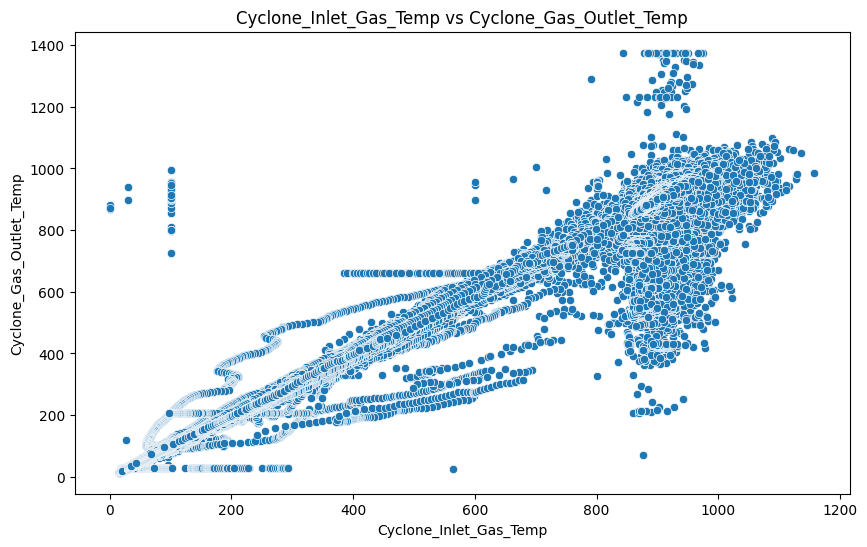

In [20]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyclone_Inlet_Gas_Temp', y='Cyclone_Gas_Outlet_Temp')
plt.title('Cyclone_Inlet_Gas_Temp vs Cyclone_Gas_Outlet_Temp')
plt.xlabel('Cyclone_Inlet_Gas_Temp')
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.show()

As visible correlation between Cyclone_Inlet_Gas_Temp and Cyclone_Gas_Outlet_Temp is approx 1, which is also obvious as ,there is a causal relation between them.

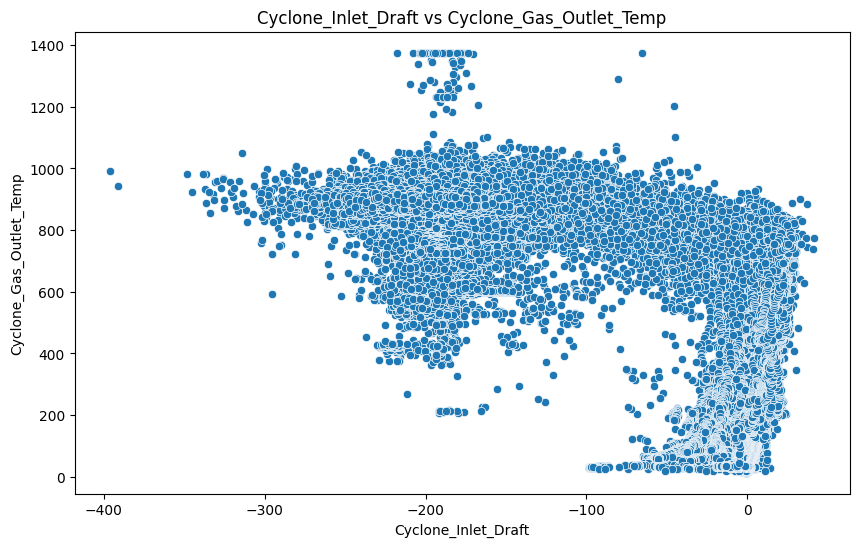

In [19]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyclone_Inlet_Draft', y='Cyclone_Gas_Outlet_Temp')
plt.title('Cyclone_Inlet_Draft vs Cyclone_Gas_Outlet_Temp')
plt.xlabel('Cyclone_Inlet_Draft')
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.show()

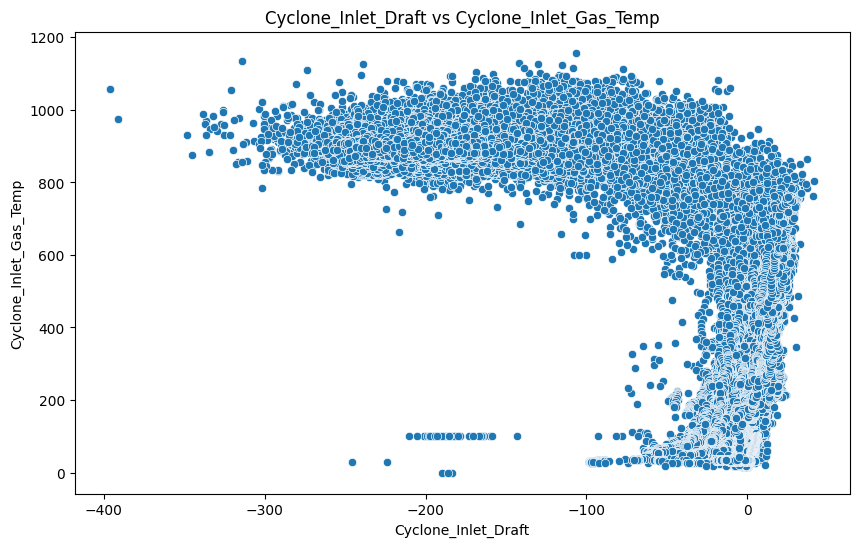

In [18]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cyclone_Inlet_Draft', y='Cyclone_Inlet_Gas_Temp')
plt.title('Cyclone_Inlet_Draft vs Cyclone_Inlet_Gas_Temp')
plt.xlabel('Cyclone_Inlet_Draft')
plt.ylabel('Cyclone_Inlet_Gas_Temp')
plt.show()

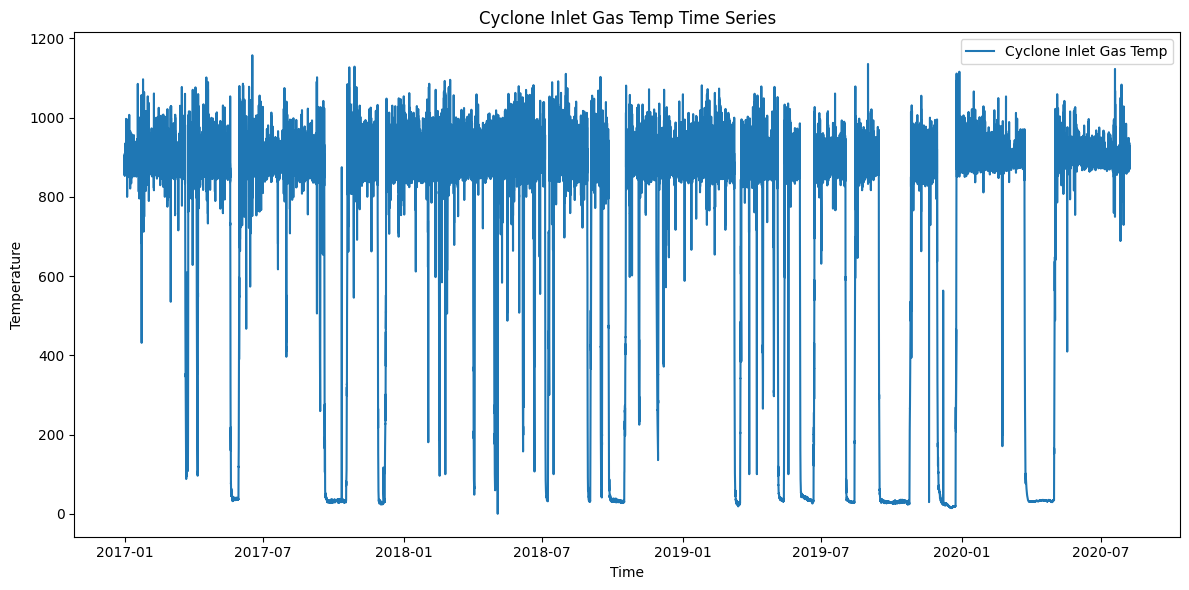

In [17]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'], label='Cyclone Inlet Gas Temp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Cyclone Inlet Gas Temp Time Series')
plt.legend()
plt.tight_layout()
plt.show()

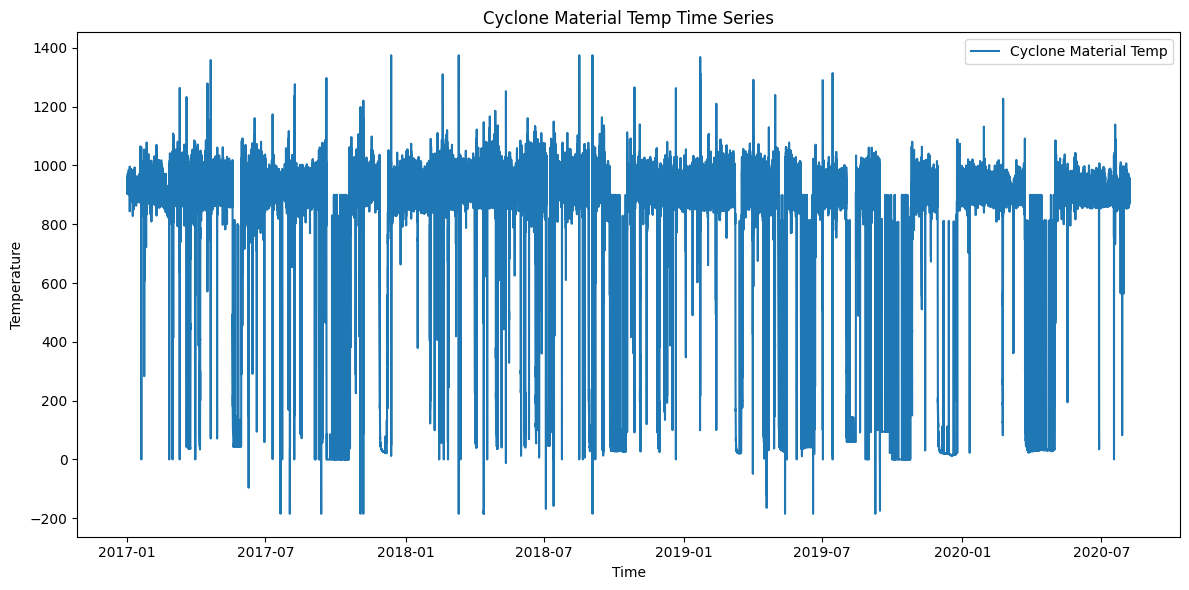

In [21]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Material_Temp'], label='Cyclone Material Temp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Cyclone Material Temp Time Series')
plt.legend()
plt.tight_layout()
plt.show()

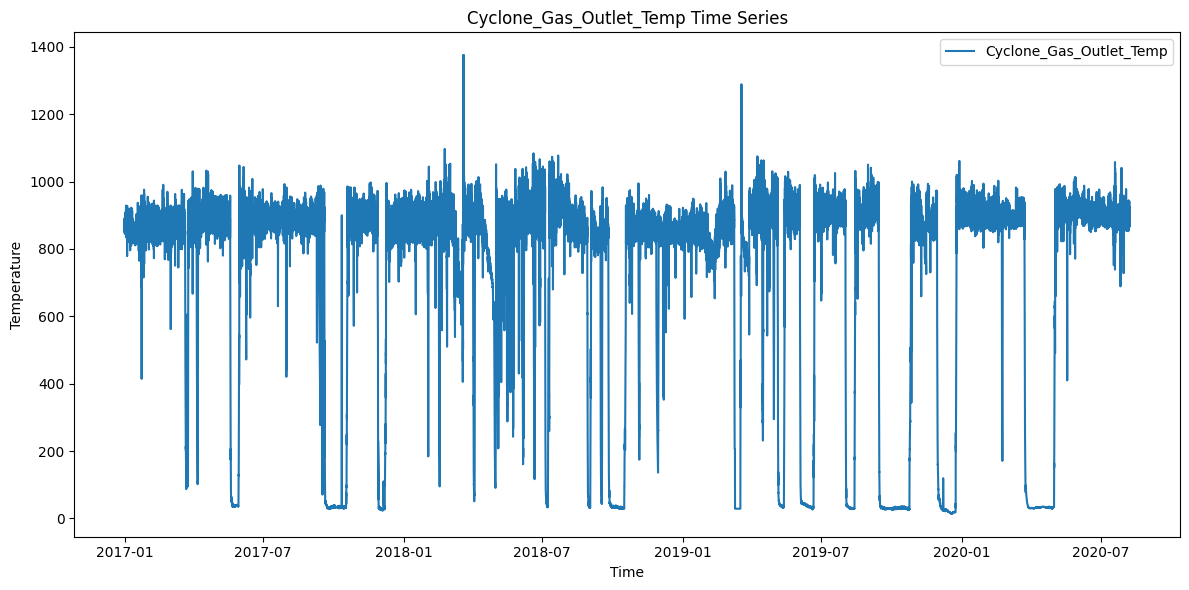

In [22]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Gas_Outlet_Temp'], label='Cyclone_Gas_Outlet_Temp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Cyclone_Gas_Outlet_Temp Time Series')
plt.legend()
plt.tight_layout()
plt.show()

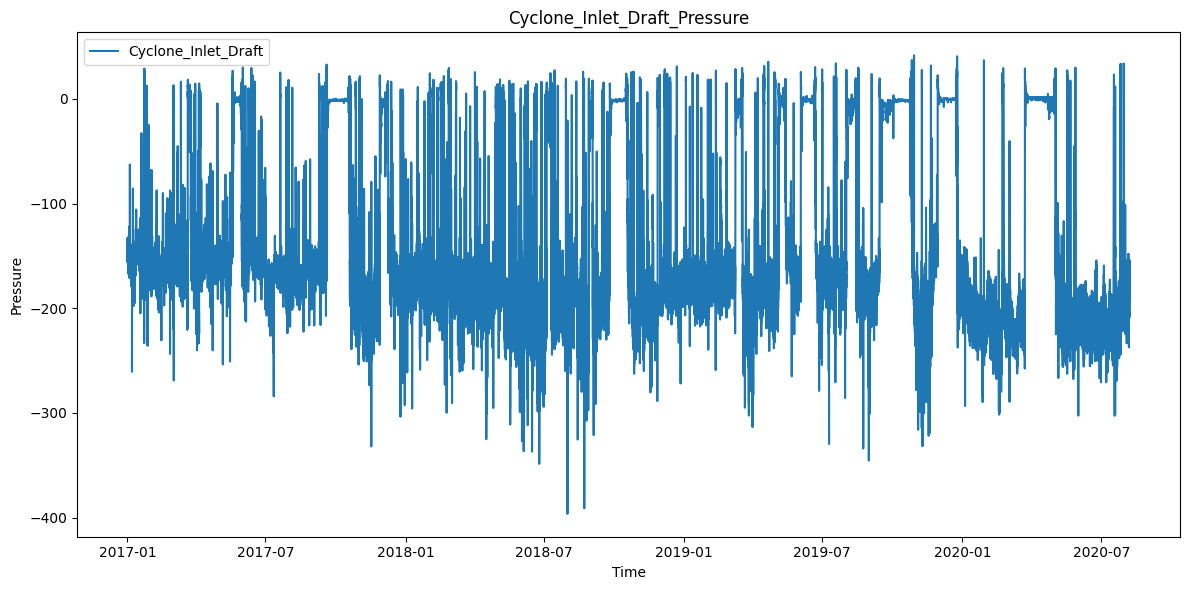

In [23]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Draft'], label='Cyclone_Inlet_Draft')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Cyclone_Inlet_Draft_Pressure')
plt.legend()
plt.tight_layout()
plt.show()

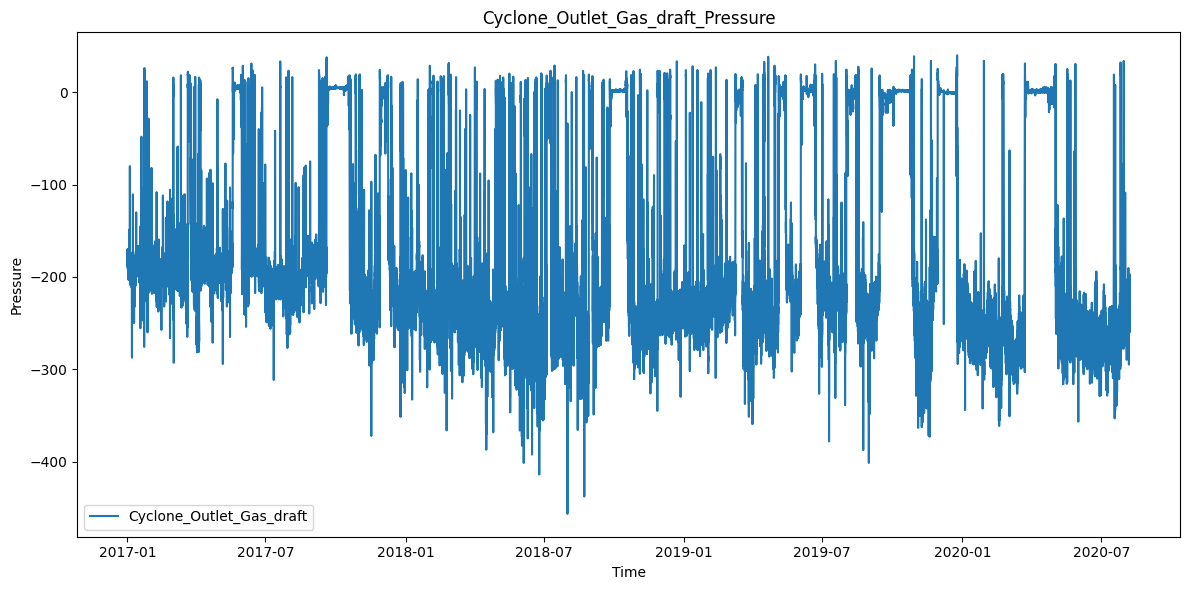

In [24]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Outlet_Gas_draft'], label='Cyclone_Outlet_Gas_draft')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Cyclone_Outlet_Gas_draft_Pressure')
plt.legend()
plt.tight_layout()
plt.show()

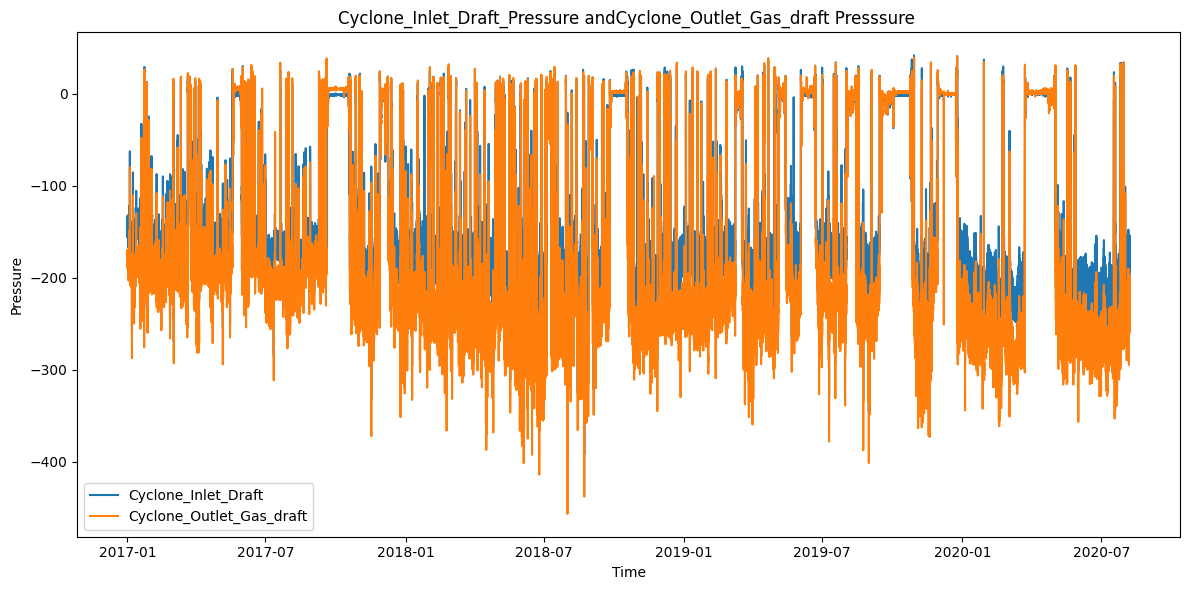

In [29]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Draft'], label='Cyclone_Inlet_Draft')
plt.plot(df['time'], df['Cyclone_Outlet_Gas_draft'], label='Cyclone_Outlet_Gas_draft')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Cyclone_Inlet_Draft_Pressure andCyclone_Outlet_Gas_draft Presssure ')
plt.legend()
plt.tight_layout()
plt.show()

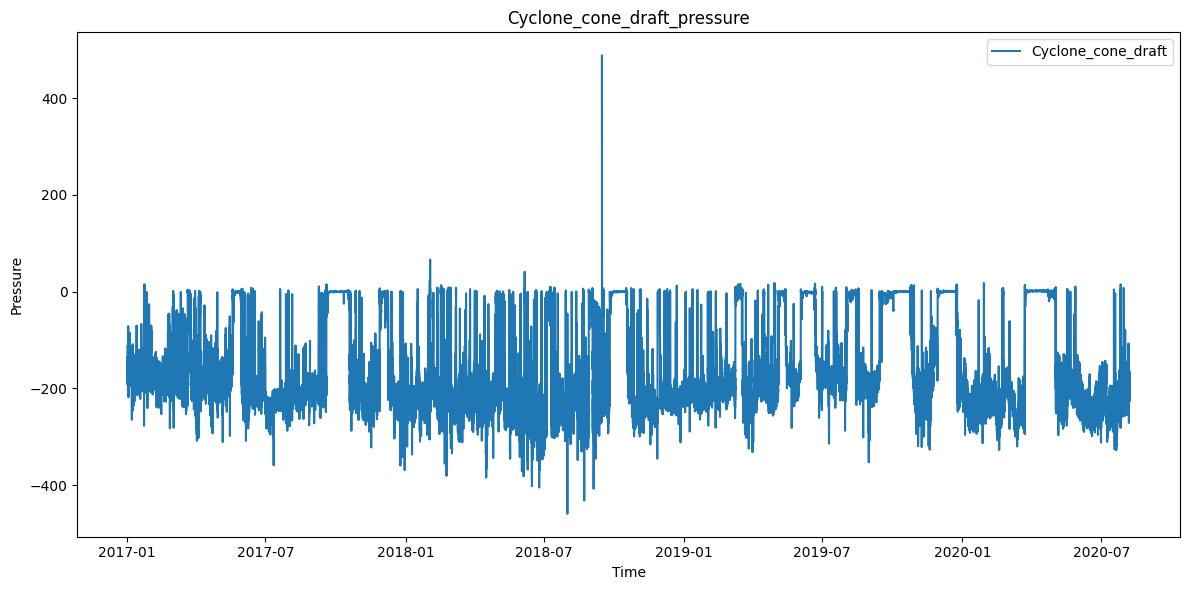

In [30]:
# Line plots of time series variables
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_cone_draft'], label='Cyclone_cone_draft')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Cyclone_cone_draft_pressure')
plt.legend()
plt.tight_layout()
plt.show()

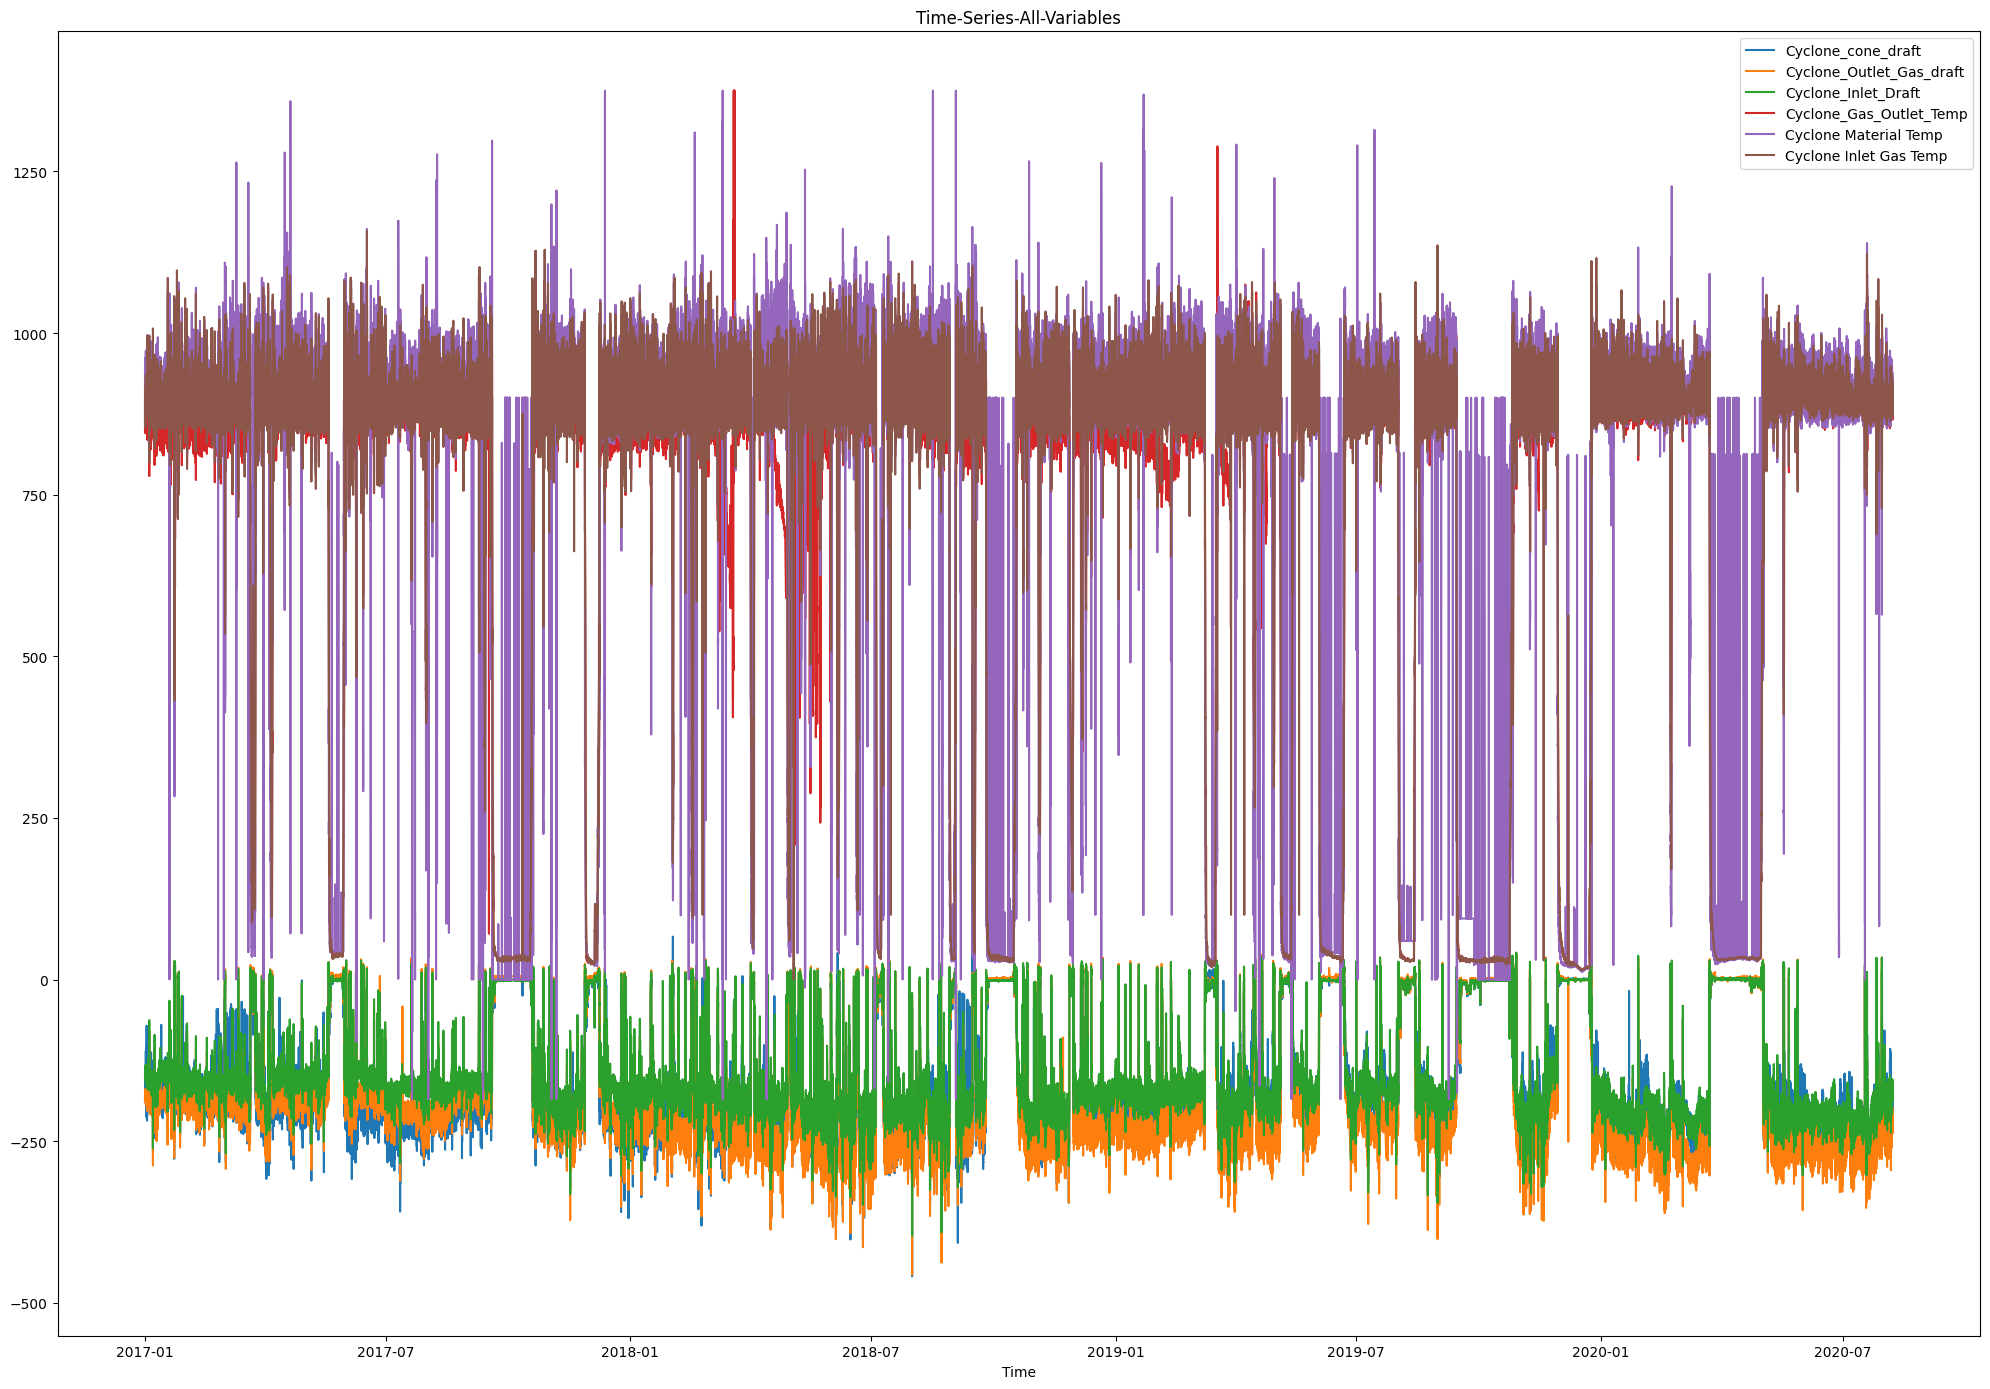

In [31]:
# Line plots of time series variables
plt.figure(figsize=(20, 14))
plt.plot(df['time'], df['Cyclone_cone_draft'], label='Cyclone_cone_draft')
plt.plot(df['time'], df['Cyclone_Outlet_Gas_draft'], label='Cyclone_Outlet_Gas_draft')
plt.plot(df['time'], df['Cyclone_Inlet_Draft'], label='Cyclone_Inlet_Draft')
plt.plot(df['time'], df['Cyclone_Gas_Outlet_Temp'], label='Cyclone_Gas_Outlet_Temp')
plt.plot(df['time'], df['Cyclone_Material_Temp'], label='Cyclone Material Temp')
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'], label='Cyclone Inlet Gas Temp')
plt.xlabel('Time')
plt.title('Time-Series-All-Variables')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
sns.relplot(df[numeric_columns])

In [35]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

As visible there are lot of fluctuations from the normal range in each variable. Maximum fluctuation is shown in Cyclone_Material_Temperature,and the minimum in Cyclone_Inlet_Draft.

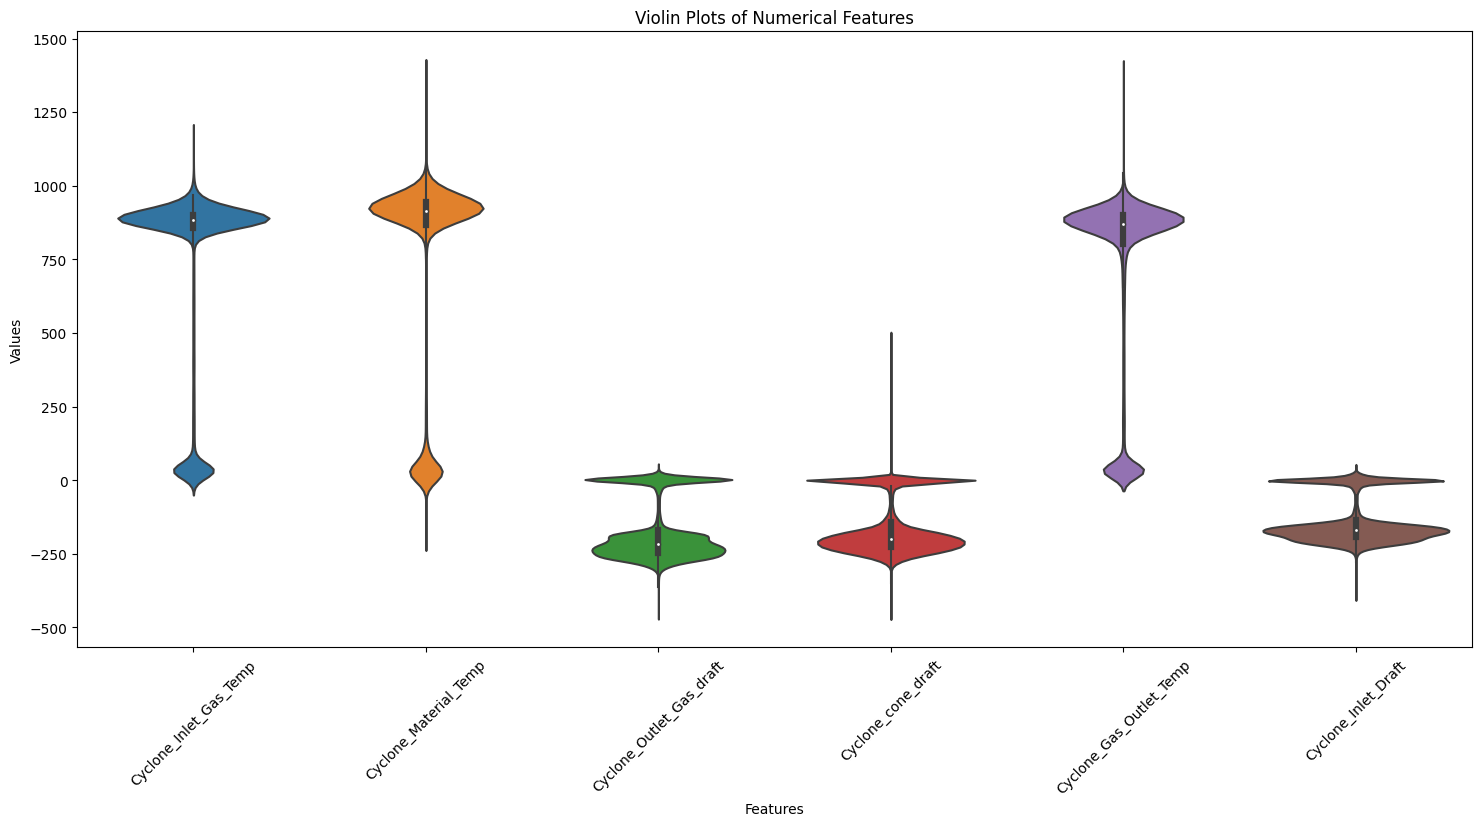

In [36]:

# Violin plots
plt.figure(figsize=(18, 8))
sns.violinplot(data=df)
plt.title('Violin Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Pair Plot
sns.pairplot(data=df)
plt.title('Pair Plot of Variables')
plt.show()

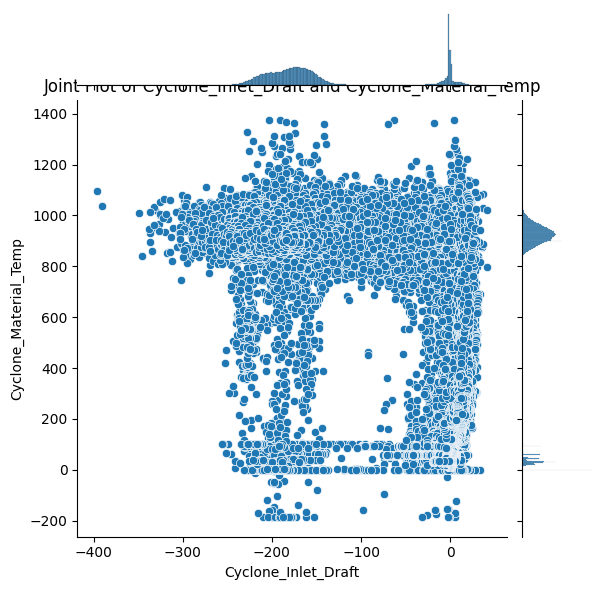

In [ ]:
# Joint Plot
sns.jointplot(data=df, x='Cyclone_Inlet_Draft', y='Cyclone_Material_Temp', kind='scatter')
plt.title('Joint Plot of Cyclone_Inlet_Draft and Cyclone_Material_Temp')
plt.show()

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extracting the numerical variables
numerical_data = df[numeric_columns]

# Standardize the numerical data
scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(numerical_data)

# Replace the original numerical columns with the standardized values
df[numeric_columns] = numerical_data_standardized

# Print the updated DataFrame
print(df.head())


                 time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                0.426823               0.454774   
1 2017-01-01 00:05:00                0.462117               0.476773   
2 2017-01-01 00:10:00                0.451285               0.493985   
3 2017-01-01 00:15:00                0.450099               0.491050   
4 2017-01-01 00:20:00                0.499937               0.522709   

   Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                 -0.118201           -0.238254                 0.419154   
1                 -0.065653           -0.194526                 0.451120   
2                 -0.034689           -0.021058                 0.461970   
3                 -0.013408           -0.113841                 0.461324   
4                 -0.005036           -0.101521                 0.492706   

   Cyclone_Inlet_Draft  
0            -0.059230  
1            -0.108962  
2            -0.047763  
3         

Extracting some useful features


In [45]:
# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['time'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [46]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['time'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01


In [47]:
# time with int to plot easily
df['time_epoch'] = (df['time'].astype(np.int64)/100000000000).astype(np.int64)

In [ ]:
df.head()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                0.426823               0.454774   
1 2017-01-01 00:05:00                0.462117               0.476773   
2 2017-01-01 00:10:00                0.451285               0.493985   
3 2017-01-01 00:15:00                0.450099               0.491050   
4 2017-01-01 00:20:00                0.499937               0.522709   

   Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                 -0.118201           -0.238254                 0.419154   
1                 -0.065653           -0.194526                 0.451120   
2                 -0.034689           -0.021058                 0.461970   
3                 -0.013408           -0.113841                 0.461324   
4                 -0.005036           -0.101521                 0.492706   

   Cyclone_Inlet_Draft  hours  daylight  DayOfTheWeek  WeekDay  time_epoch  \
0            -0.059230      0         0             6        0    14832288   
1            -0.108962      0         0             6        0    14832291   
2            -0.047763      0         0             6        0    14832294   
3            -0.019547      0         0             6        0    14832297   
4            -0.026891      0         0             6        0    14832300   

   categories  
0           0  
1           0  
2           0  
3           0  
4           0

In [ ]:
df.drop('categories',axis =1)

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0      2017-01-01 00:00:00                0.426823               0.454774   
1      2017-01-01 00:05:00                0.462117               0.476773   
2      2017-01-01 00:10:00                0.451285               0.493985   
3      2017-01-01 00:15:00                0.450099               0.491050   
4      2017-01-01 00:20:00                0.499937               0.522709   
...                    ...                     ...                    ...   
377714 2020-08-07 11:55:00                0.523548               0.481475   
377715 2020-08-07 12:00:00                0.464156               0.410889   
377716 2020-08-07 12:05:00                0.486367               0.412827   
377717 2020-08-07 12:10:00                0.551175               0.471615   
377718 2020-08-07 12:15:00                0.467077               0.440212   

        Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                      -0.118201           -0.238254                 0.419154   
1                      -0.065653           -0.194526                 0.451120   
2                      -0.034689           -0.021058                 0.461970   
3                      -0.013408           -0.113841                 0.461324   
4                      -0.005036           -0.101521                 0.492706   
...                          ...                 ...                      ...   
377714                 -0.466472           -0.501620                 0.569394   
377715                 -0.506513           -0.518378                 0.498915   
377716                 -0.527391           -0.555780                 0.521168   
377717                 -0.541512           -0.593958                 0.585346   
377718                 -0.576914           -0.608941                 0.511271   

        Cyclone_Inlet_Draft  hours  daylight  DayOfTheWeek  WeekDay  \
0                 -0.059230      0         0             6        0   
1                 -0.108962      0         0             6        0   
2                 -0.047763      0         0             6        0   
3                 -0.019547      0         0             6        0   
4                 -0.026891      0         0             6        0   
...                     ...    ...       ...           ...      ...   
377714            -0.436088     11         1             4        1   
377715            -0.459150     12         1             4        1   
377716            -0.488010     12         1             4        1   
377717            -0.523828     12         1             4        1   
377718            -0.550369     12         1             4        1   

        time_epoch  
0         14832288  
1         14832291  
2         14832294  
3         14832297  
4         14832300  
...            ...  
377714    15968013  
377715    15968016  
377716    15968019  
377717    15968022  
377718    15968025  

[377719 rows x 12 columns]

In [ ]:
sns.pairplot(df)

In [48]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

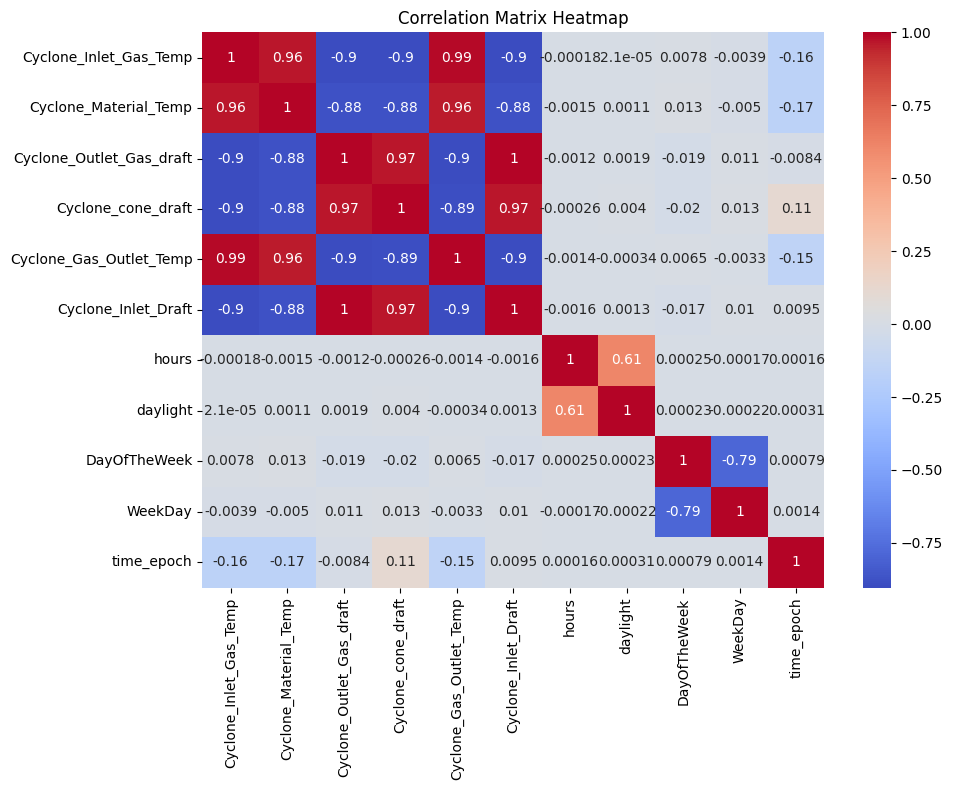

In [49]:
# Correlation matrix heatmap
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

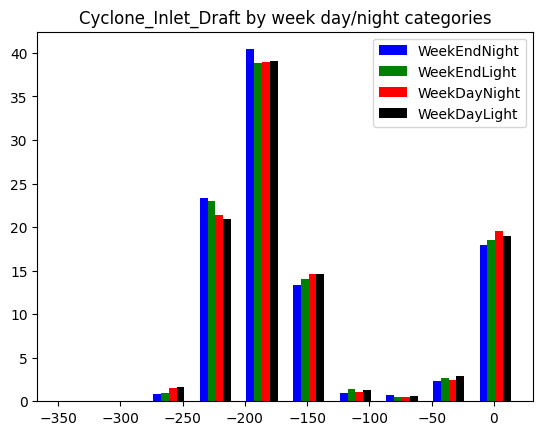

In [51]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'Cyclone_Inlet_Draft']
b = df.loc[df['categories'] == 1, 'Cyclone_Inlet_Draft']
c = df.loc[df['categories'] == 2, 'Cyclone_Inlet_Draft']
d = df.loc[df['categories'] == 3, 'Cyclone_Inlet_Draft']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')
plt.title('Cyclone_Inlet_Draft by week day/night categories')
plt.legend()
plt.show()

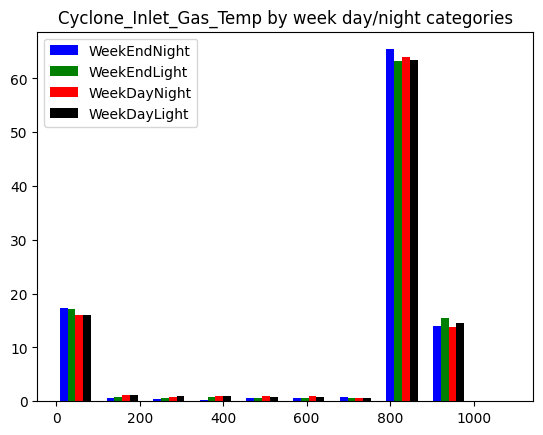

In [52]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'Cyclone_Inlet_Gas_Temp']
b = df.loc[df['categories'] == 1, 'Cyclone_Inlet_Gas_Temp']
c = df.loc[df['categories'] == 2, 'Cyclone_Inlet_Gas_Temp']
d = df.loc[df['categories'] == 3, 'Cyclone_Inlet_Gas_Temp']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')
plt.title('Cyclone_Inlet_Gas_Temp by week day/night categories')
plt.legend()
plt.show()

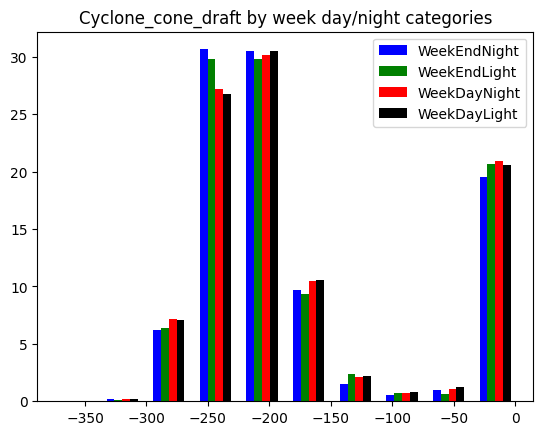

In [53]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'Cyclone_cone_draft']
b = df.loc[df['categories'] == 1, 'Cyclone_cone_draft']
c = df.loc[df['categories'] == 2, 'Cyclone_cone_draft']
d = df.loc[df['categories'] == 3, 'Cyclone_cone_draft']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')
plt.title('Cyclone_cone_draft by week day/night categories')
plt.legend()
plt.show()

We may see that the parameters remain uniform irrespective  of weekdays/weekends and day/night, which is very obvious for a plant that has to function properly.

In [54]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'hours', 'daylight',
       'DayOfTheWeek', 'WeekDay', 'time_epoch', 'categories'],
      dtype='object')

Time to feed our AUTOENCODER

In [84]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Data Preparation
selected_vars = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft',
                 'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft','hours', 'daylight',
                  'DayOfTheWeek', 'WeekDay']
data = df[selected_vars].values

# Step 2: Data Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Autoencoder Architecture
input_dim = scaled_data.shape[1]
encoding_dim = 4  # Choose the desired size of the latent space

input_data = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_data)
decoder = tf.keras.layers.Dense(input_dim)(encoder)
autoencoder = tf.keras.models.Model(inputs=input_data, outputs=decoder)

# Step 4: Model Training
autoencoder.compile(optimizer='adam', loss='mse')
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
autoencoder.fit(scaled_data, scaled_data, epochs=25, batch_size=32, shuffle=True,callbacks=[early_stopping])

# Step 5: Reconstruction Error Calculation
reconstructed_data = autoencoder.predict(scaled_data)
reconstruction_error = np.mean(np.square(scaled_data - reconstructed_data), axis=1)

# Step 6: Anomaly Threshold
threshold = np.percentile(reconstruction_error, 98 )  # Adjust the percentile as needed

# Step 7: Anomaly Detection
anomalies = np.where(reconstruction_error > threshold)[0]

# Print the indices of detected anomalies
print("Detected Anomalies:", anomalies)


Epoch 1/25
11754/11754 [==============================] - 19s 2ms/step - loss: 0.0957
Epoch 2/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0585
Epoch 3/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 4/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 5/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 6/25
11754/11754 [==============================] - 19s 2ms/step - loss: 0.0584
Epoch 7/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 8/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 9/25
11754/11754 [==============================] - 17s 1ms/step - loss: 0.0584
Epoch 10/25
11754/11754 [==============================] - 18s 2ms/step - loss: 0.0584
Epoch 11/25
11754/11754 [==============================] - 17s 1ms/step - loss: 0.0584
Epoch 12/25
11754/11754 [===========================

In [85]:
anomaly_timestamps = df['time'].iloc[anomalies]

# Print the timestamps of detected anomalies
print("Detected Anomalies:")
for timestamp in anomaly_timestamps:
    print(timestamp)


Streaming output truncated to the last 5000 lines.
2018-02-28 19:15:00
2018-02-28 19:20:00
2018-02-28 19:30:00
2018-02-28 19:35:00
2018-03-07 23:10:00
2018-03-07 23:15:00
2018-03-07 23:20:00
2018-03-07 23:25:00
2018-03-07 23:30:00
2018-03-07 23:35:00
2018-03-07 23:40:00
2018-03-07 23:45:00
2018-03-07 23:50:00
2018-03-07 23:55:00
2018-03-08 00:00:00
2018-03-08 00:05:00
2018-03-08 00:10:00
2018-03-08 00:15:00
2018-03-08 00:20:00
2018-03-08 00:25:00
2018-03-08 00:35:00
2018-03-08 00:40:00
2018-03-08 00:45:00
2018-03-08 00:50:00
2018-03-08 00:55:00
2018-03-08 01:00:00
2018-03-11 13:00:00
2018-03-11 13:15:00
2018-03-11 13:20:00
2018-03-11 13:25:00
2018-03-11 13:30:00
2018-03-11 13:35:00
2018-03-11 13:40:00
2018-03-11 13:45:00
2018-03-11 13:50:00
2018-03-11 13:55:00
2018-03-11 14:00:00
2018-03-11 14:05:00
2018-03-11 14:10:00
2018-03-11 14:15:00
2018-03-11 14:20:00
2018-03-11 14:25:00
2018-03-11 14:30:00
2018-03-11 14:35:00
2018-03-11 14:40:00
2018-03-11 14:45:00
2018-03-11 14:50:00
2018-03-1

In [86]:
abnormal_periods = []

for anomaly_index in anomalies:
    start_time = df['time'].iloc[anomaly_index]
    end_time = start_time + pd.DateOffset(minutes=5)  # Adjust the duration of the abnormal period

    abnormal_periods.append((start_time, end_time))

# Print the abnormal periods
print("Abnormal Periods:")
for period in abnormal_periods:
    print("Start:", period[0], "End:", period[1])


Streaming output truncated to the last 5000 lines.
Start: 2018-02-28 19:15:00 End: 2018-02-28 19:20:00
Start: 2018-02-28 19:20:00 End: 2018-02-28 19:25:00
Start: 2018-02-28 19:30:00 End: 2018-02-28 19:35:00
Start: 2018-02-28 19:35:00 End: 2018-02-28 19:40:00
Start: 2018-03-07 23:10:00 End: 2018-03-07 23:15:00
Start: 2018-03-07 23:15:00 End: 2018-03-07 23:20:00
Start: 2018-03-07 23:20:00 End: 2018-03-07 23:25:00
Start: 2018-03-07 23:25:00 End: 2018-03-07 23:30:00
Start: 2018-03-07 23:30:00 End: 2018-03-07 23:35:00
Start: 2018-03-07 23:35:00 End: 2018-03-07 23:40:00
Start: 2018-03-07 23:40:00 End: 2018-03-07 23:45:00
Start: 2018-03-07 23:45:00 End: 2018-03-07 23:50:00
Start: 2018-03-07 23:50:00 End: 2018-03-07 23:55:00
Start: 2018-03-07 23:55:00 End: 2018-03-08 00:00:00
Start: 2018-03-08 00:00:00 End: 2018-03-08 00:05:00
Start: 2018-03-08 00:05:00 End: 2018-03-08 00:10:00
Start: 2018-03-08 00:10:00 End: 2018-03-08 00:15:00
Start: 2018-03-08 00:15:00 End: 2018-03-08 00:20:00
Start: 2018-0

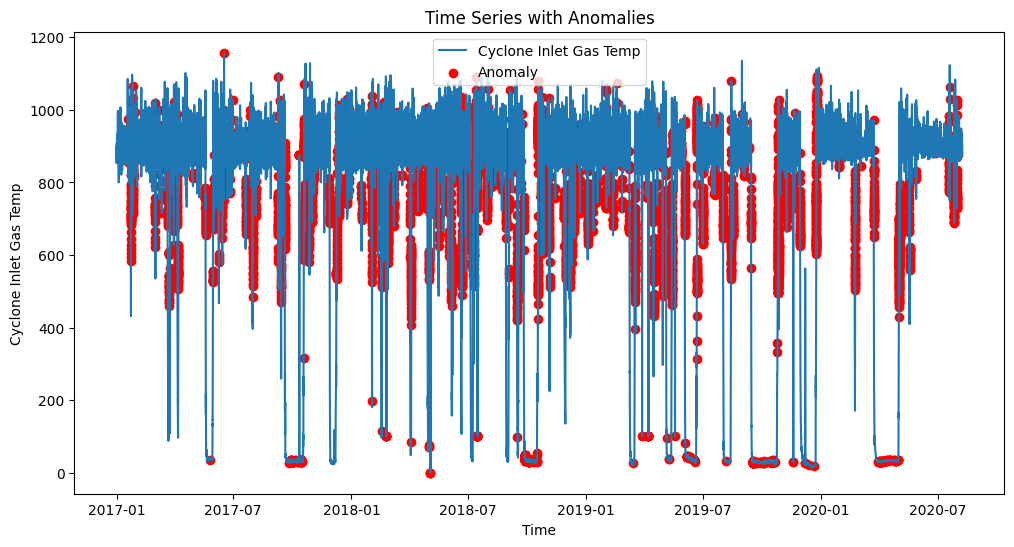

In [87]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'], label='Cyclone Inlet Gas Temp')

# Marking the anomalies
anomaly_timestamps = df['time'].iloc[anomalies]
anomaly_values = df['Cyclone_Inlet_Gas_Temp'].iloc[anomalies]
plt.scatter(anomaly_timestamps, anomaly_values, color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Cyclone Inlet Gas Temp')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()


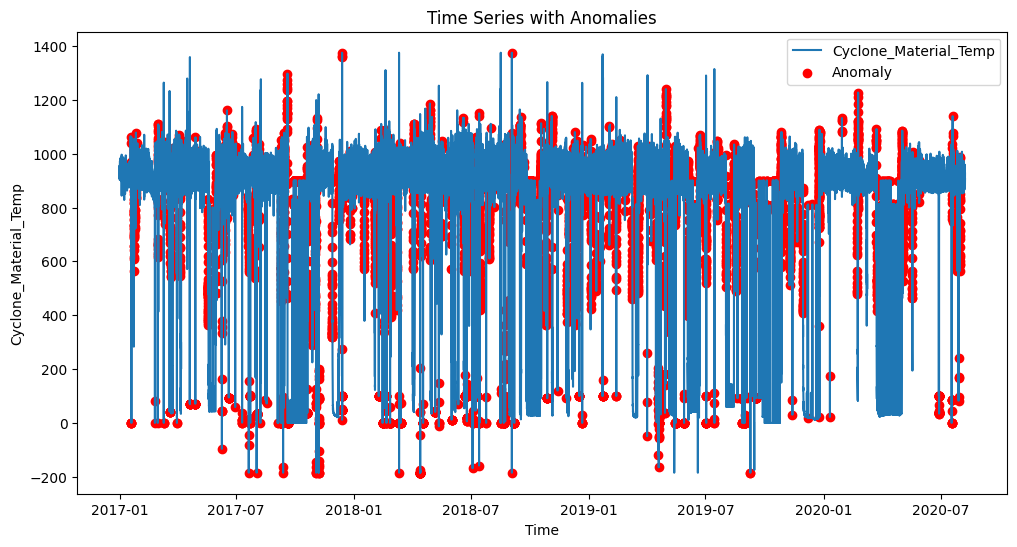

In [88]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Material_Temp'], label='Cyclone_Material_Temp')

# Marking the anomalies
anomaly_timestamps = df['time'].iloc[anomalies]
anomaly_values = df['Cyclone_Material_Temp'].iloc[anomalies]
plt.scatter(anomaly_timestamps, anomaly_values, color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()


In [89]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Draft'], label='Cyclone_Inlet_Draft')

# Marking the anomalies
anomaly_timestamps = df['time'].iloc[anomalies]
anomaly_values = df['Cyclone_Inlet_Draft'].iloc[anomalies]
plt.scatter(anomaly_timestamps, anomaly_values, color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Draft')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

Since all the other parameters were highly correlated with Cyclone_Inlet_Draft , the anomalies in other parameters are also correlated, as seen during EDA,we can see that, our model is good at detecting anomalies in every parameter of the dataset.

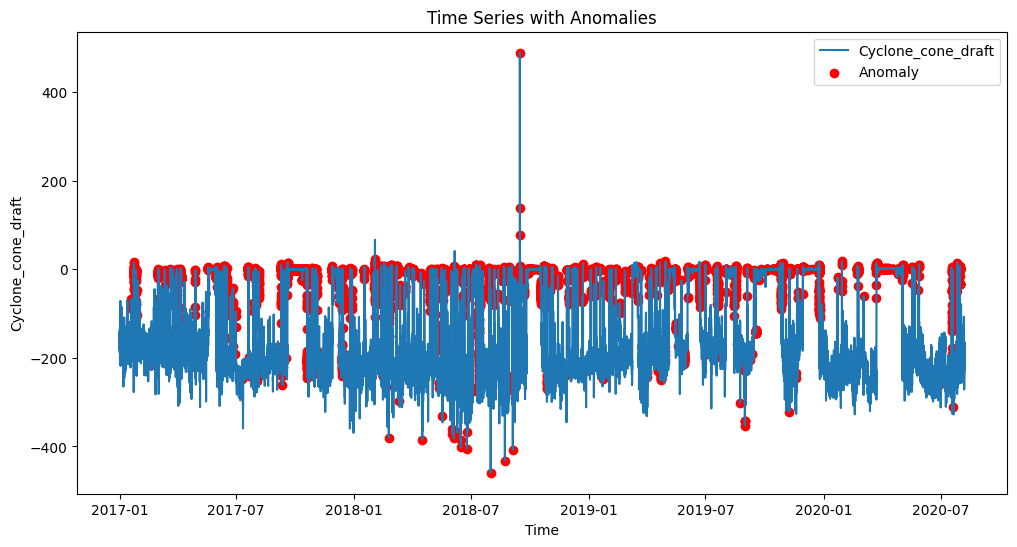

In [90]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Cyclone_cone_draft'], label='Cyclone_cone_draft')

# Marking the anomalies
anomaly_timestamps = df['time'].iloc[anomalies]
anomaly_values = df['Cyclone_cone_draft'].iloc[anomalies]
plt.scatter(anomaly_timestamps, anomaly_values, color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Cyclone_cone_draft')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

On experimenting further with the values of Epochs(10-50) and threshold values(90-99),25 Epochs and 98 percentile threshold seems to be an optimal choice.

Although the solution seems to overfit, accuracy may improve by feeding more data.